In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
with np.load("/home/mohan/mars_lst_binned_data/lstbin_40_mars2_raw_pol00_oldFEE.npz") as f:
    data=f["data"]
    mask=f["mask"]
with np.load("/home/mohan/mars_lst_binned_data/lstbin_40_mars2_raw_pol00_newFEE.npz") as f:
    data2=f["data"]
    mask2=f["mask"]

In [10]:
arr=np.ma.MaskedArray(data,mask)
arr2=np.ma.MaskedArray(data2,mask2)

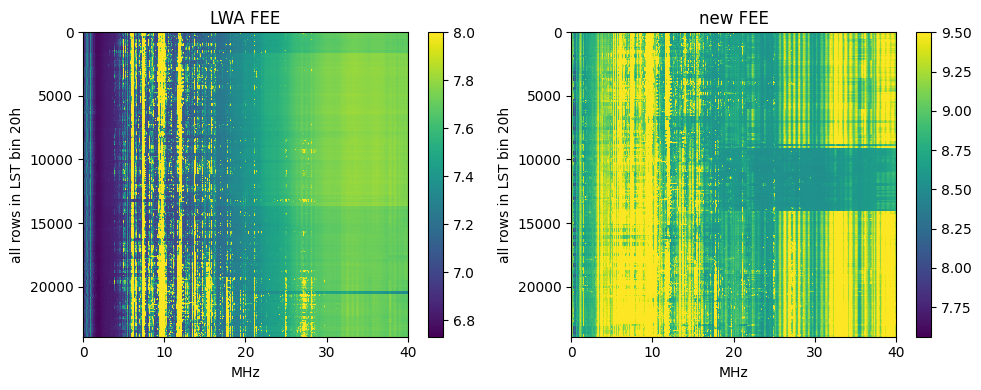

In [11]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
myext=[0,125, data.shape[0],0]
maxc=int(40/0.061)
plt.imshow(np.log10(data),aspect="auto",extent=myext, vmax=8,interpolation="none")
plt.colorbar()
plt.xlabel("MHz")
plt.title("LWA FEE")
plt.ylabel("all rows in LST bin 20h")
plt.xlim(0,40)

plt.subplot(122)
myext=[0,125, data.shape[0],0]
plt.imshow(np.log10(data2),aspect="auto",extent=myext, vmax=9.5,interpolation="none")
plt.colorbar()
plt.xlim(0,40)
plt.title("new FEE")
plt.xlabel("MHz")
plt.ylabel("all rows in LST bin 20h")

plt.tight_layout()

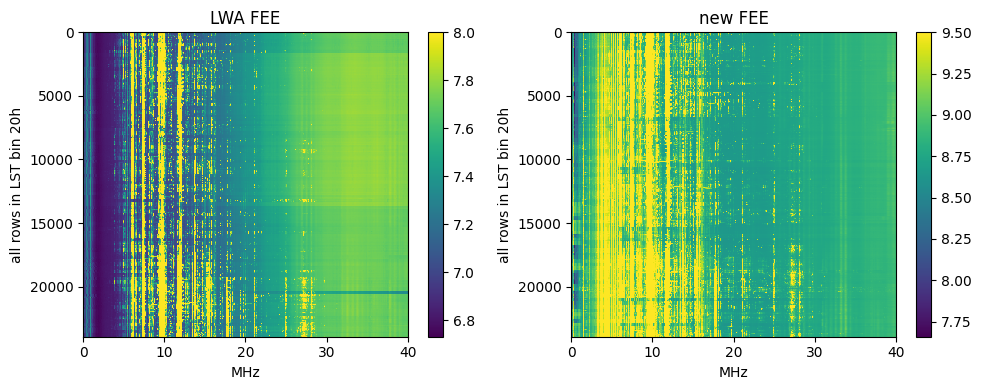

In [47]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
myext=[0,125, data.shape[0],0]
maxc=int(40/0.061)
plt.imshow(np.percentile(np.log10(data),aspect="auto",extent=myext, vmax=8,interpolation="none")
plt.colorbar()
plt.xlabel("MHz")
plt.title("LWA FEE")
plt.ylabel("all rows in LST bin 20h")
plt.xlim(0,40)

plt.subplot(122)
myext=[0,125, data.shape[0],0]
plt.imshow(np.log10(data2),aspect="auto",extent=myext, vmax=9.5,interpolation="none")
plt.colorbar()
plt.xlim(0,40)
plt.title("new FEE")
plt.xlabel("MHz")
plt.ylabel("all rows in LST bin 20h")

plt.tight_layout()

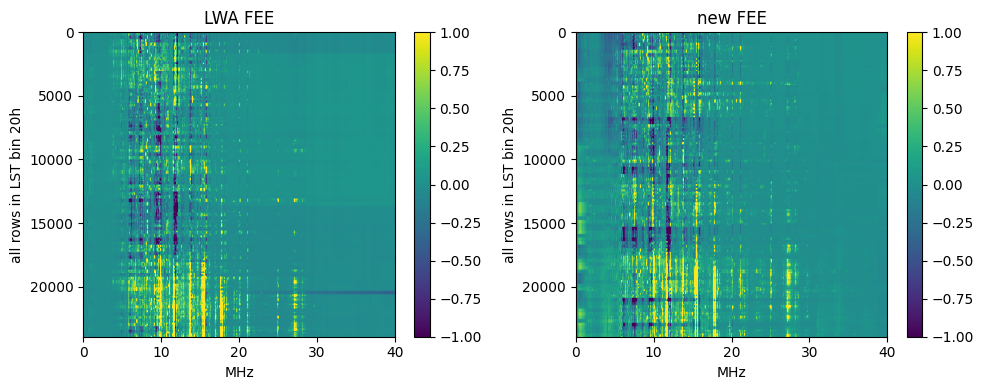

In [39]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
myext=[0,125, data.shape[0],0]
maxc=int(40/0.061)
norm=np.log10(np.median(data,axis=0))
plt.imshow(np.log10(data)-norm,aspect="auto",extent=myext, vmax=1,vmin=-1)
plt.colorbar()
plt.xlabel("MHz")
plt.title("LWA FEE")
plt.ylabel("all rows in LST bin 20h")
plt.xlim(0,40)

plt.subplot(122)
myext=[0,125, data.shape[0],0]
norm=np.log10(np.median(data2,axis=0))
plt.imshow(np.log10(data2)-norm,aspect="auto",extent=myext,vmax=1,vmin=-1)
plt.colorbar()
plt.xlim(0,40)
plt.title("new FEE")
plt.xlabel("MHz")
plt.ylabel("all rows in LST bin 20h")

plt.tight_layout()

Text(0.5, 0, 'MHz')

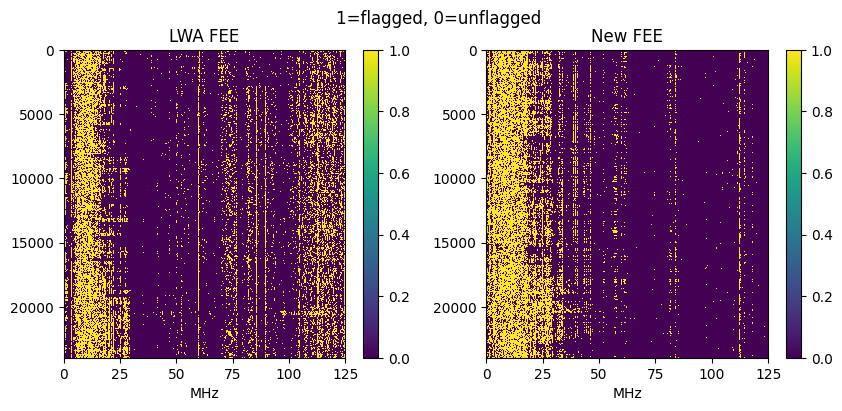

In [45]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.suptitle("1=flagged, 0=unflagged")
myext=[0,125, data.shape[0],0]
plt.subplot(121)
plt.title("LWA FEE")
plt.imshow(mask,aspect="auto",extent=myext,interpolation="none")
plt.colorbar()
plt.xlabel("MHz")


myext=[0,125, data.shape[0],0]
plt.subplot(122)
plt.title("New FEE")
plt.imshow(mask2,aspect="auto",extent=myext,interpolation="none")
plt.colorbar()
plt.xlabel("MHz")

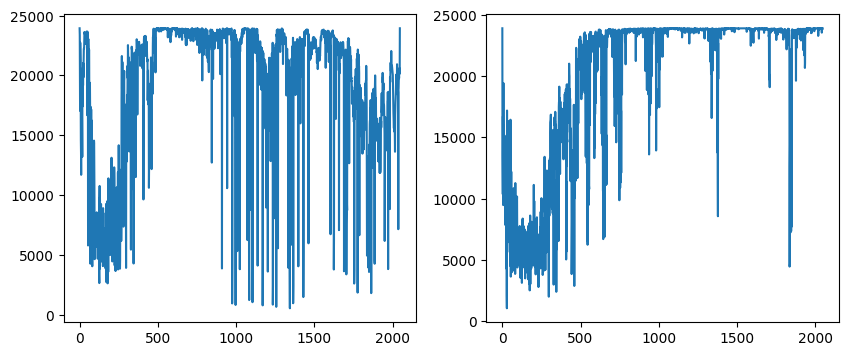

In [8]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.plot(mask.shape[0]-np.sum(mask,axis=0))

plt.subplot(122)
plt.plot(mask2.shape[0]-np.sum(mask2,axis=0))


In [27]:
filled_arr=arr.filled(fill_value=np.nan)

(0.0, 60.0)

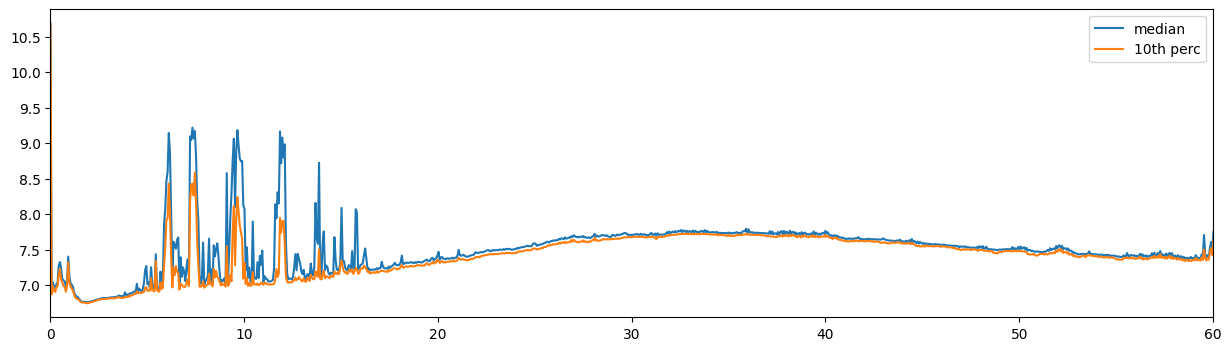

In [7]:
f=plt.gcf()
f.set_size_inches(15,4)
freqs = np.linspace(0,125,2048)
plt.plot(freqs,np.log10(np.percentile(data,50,axis=0)),label="median")
# plt.plot(freqs,np.log10(np.nanmedian(filled_arr,axis=0)), label="median of masked")

plt.plot(freqs,np.log10(np.percentile(data,10,axis=0)),label="10th perc")
# plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)))
plt.legend()
plt.xlim(0,60)

In [79]:
df = pd.read_csv("/home/mohan/canadian_spectrum_allocations_kHz_MHz.csv")


In [93]:
df_slice = df[df['Primary Service'].str.contains(r'AMATEUR|BROADCAST',regex=True)]


Text(0.5, 0, 'MHz')

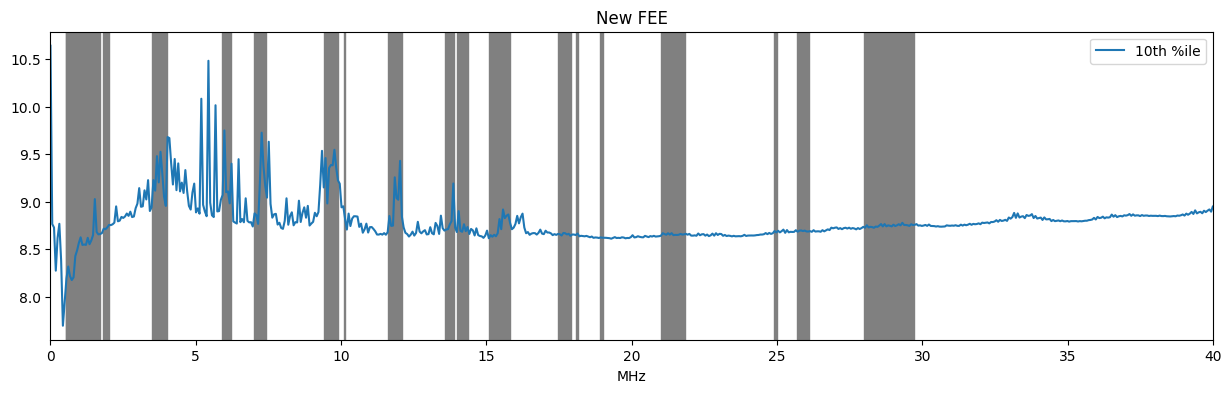

In [97]:
f=plt.gcf()
f.set_size_inches(15,4)
freqs = np.linspace(0,125,2048)
plt.title("New FEE")
# plt.plot(freqs,np.log10(np.percentile(data2,50,axis=0)),label="median")
# plt.plot(freqs,np.log10(np.nanmedian(filled_arr,axis=0)), label="median of masked")

plt.plot(freqs,np.log10(np.percentile(data2,2,axis=0)),label="10th %ile")

# plt.plot(freqs,np.log10(np.percentile(data2,2,axis=0)),label="2nd %ile")
for i,r in df_slice.iterrows():
    plt.axvspan(r['Start Frequency'],r['End Frequency'],color='gray')
# plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)))
plt.legend()
plt.xlim(0,40)
plt.xlabel("MHz")

Text(0.5, 1.0, 'MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24')

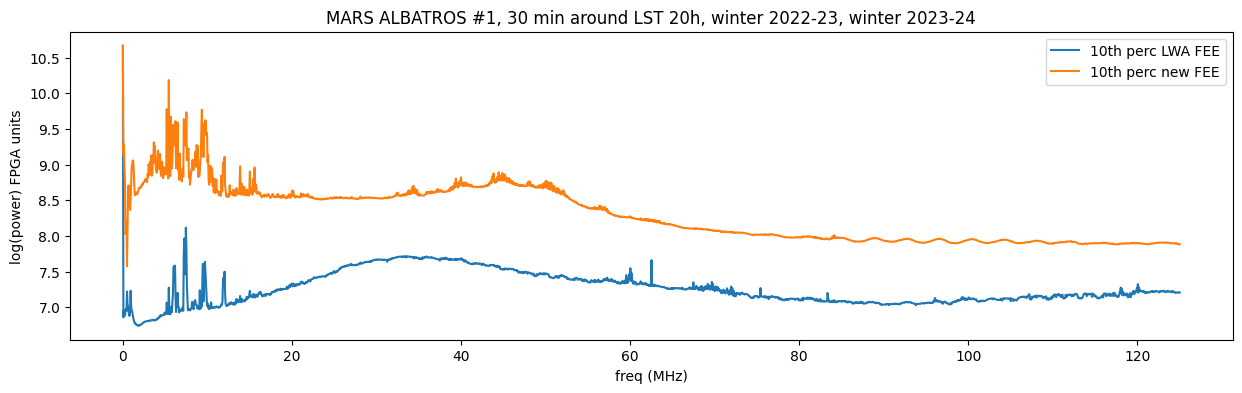

In [6]:
f=plt.gcf()
f.set_size_inches(15,4)
freqs = np.linspace(0,125,2048)
plt.plot(freqs,np.log10(np.percentile(data,2,axis=0)),label="10th perc LWA FEE")
plt.plot(freqs,np.log10(np.percentile(data2,2,axis=0)),label="10th perc new FEE")
# plt.plot(freqs,np.log10(np.mean(data,axis=0)),label="mean LWA FEE")
# plt.plot(freqs,np.log10(np.mean(data2,axis=0)),label="mean new FEE")
# plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)))
plt.legend()
plt.xlabel("freq (MHz)")
plt.ylabel("log(power) FPGA units")
plt.title("MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24")
# plt.xlim(0,80)

Text(0.5, 1.0, 'MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24')

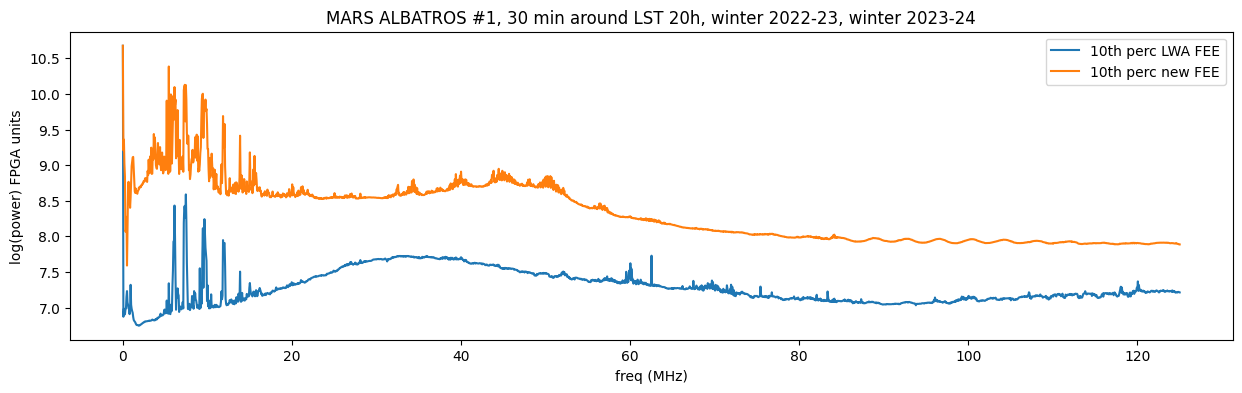

In [5]:
f=plt.gcf()
f.set_size_inches(15,4)
freqs = np.linspace(0,125,2048)
plt.plot(freqs,np.log10(np.percentile(data,10,axis=0)),label="10th perc LWA FEE")
plt.plot(freqs,np.log10(np.percentile(data2,10,axis=0)),label="10th perc new FEE")
# plt.plot(freqs,np.log10(np.mean(data,axis=0)),label="mean LWA FEE")
# plt.plot(freqs,np.log10(np.mean(data2,axis=0)),label="mean new FEE")
# plt.plot(freqs,np.log10(np.percentile(data,5,axis=0)))
plt.legend()
plt.xlabel("freq (MHz)")
plt.ylabel("log(power) FPGA units")
plt.title("MARS ALBATROS #1, 30 min around LST 20h, winter 2022-23, winter 2023-24")
# plt.xlim(0,80)

In [14]:
arr.shape, arr2.shape

((23938, 2048), (23916, 2048))